### Pandas Tutorial

#### Importing Packages and Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Create a dataframe, sales, from a csv file, all_sales

In [32]:
sales = pd.read_csv('all_sales.csv')

In [12]:
sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [33]:
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Check the total number of blank rows

In [34]:
sales.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Removing all nulls/blank rows using the dropna() method

In [35]:
sales = sales.dropna()
sales.info()
sales.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Answering the Q1.

Q1. Which month has the most sales?

### Creating a month from the Order Date Column

In [36]:
sales['Month'] = sales['Order Date'].str[0:2]

sales['Month']

0         04
2         04
3         04
4         04
5         04
          ..
186845    09
186846    09
186847    09
186848    09
186849    09
Name: Month, Length: 186305, dtype: object

### Convert Data Type of Month column from object to integer

In [37]:
# Remove rows with non-numeric values in 'Month' column
#sales = sales[pd.to_numeric(sales['Month'], errors='coerce').notna()]

sales['Month'] = sales['Month'].astype('int32')
sales.info()

ValueError: invalid literal for int() with base 10: 'Or'

### Create "OR_dump" DataFrame or to check and remove the OR in the Month column

In [38]:
OR_dump = sales[sales['Month'] == 'Or']
OR_dump.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


### Remove the 'Or' from the Month Column

In [39]:
sales = sales[sales['Month']!= 'Or']

In [40]:
OR_dump = sales[sales['Month'] == 'Or']
OR_dump.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


### Convert Month column to integer again

In [41]:
sales['Month'] = sales['Month'].astype('int32')
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Create a Sales column by multiplying Quantity Ordered and Price Each column

In [42]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


#### Convert Quantity Ordered and Price Each column to the correct data type

In [43]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])

sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [44]:
qo = sales['Quantity Ordered']
pe = sales['Price Each']
sales['Sales'] = qo*pe

sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### What do you want to know about the Data Frame?

#### Q1. Which month has the most sales?

#### Q2. What is the monthly sales trend?

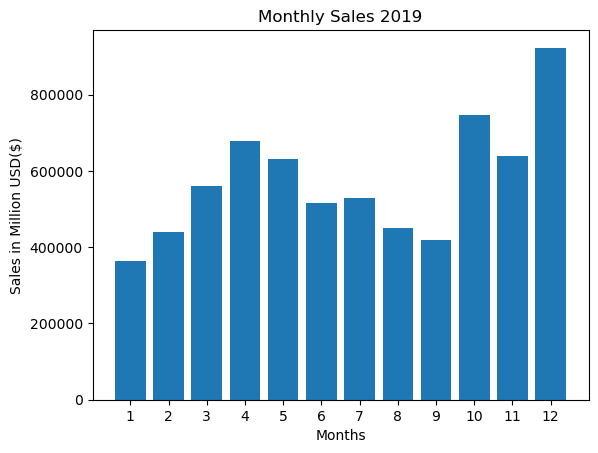

In [45]:
months = range(1,13)
plt.bar(months, sales.groupby(['Month']).sum()['Sales']/5)
plt.title('Monthly Sales 2019')
plt.ylabel("Sales in Million USD($)")
plt.xlabel("Months")

plt.xticks(months)
plt.show()

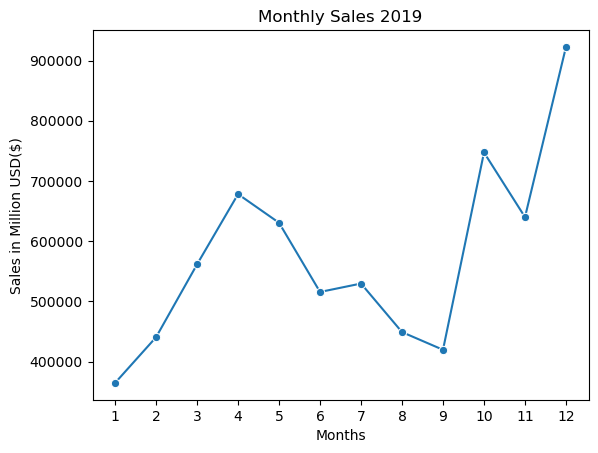

In [46]:
months = range(1,13)
sns.lineplot(x=months, y=sales.groupby(['Month']).sum()['Sales']/5, marker = 'o')
plt.title('Monthly Sales 2019')
plt.ylabel("Sales in Million USD($)")
plt.xlabel("Months")

plt.xticks(months)
plt.show()

fig = plt.figure(figsize = (10,6))

months = range(1,13)
plt.plot(months, sales.groupby(['Month']).sum()['Sales']/1000000, linestyle = '--', marker = 'o')
plt.title('Monthly Sales 2019', fontsize = 14, fontweight = 'bold')
plt.ylabel("Sales in Million USD($)", fontsize = 14, color = 'y')
plt.xlabel('Months', fontsize = 14, color = 'y')

plt.xticks(months)

plt.grid(True, color='g', linestyle = ':')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

### Q2. Which Product sold the most?

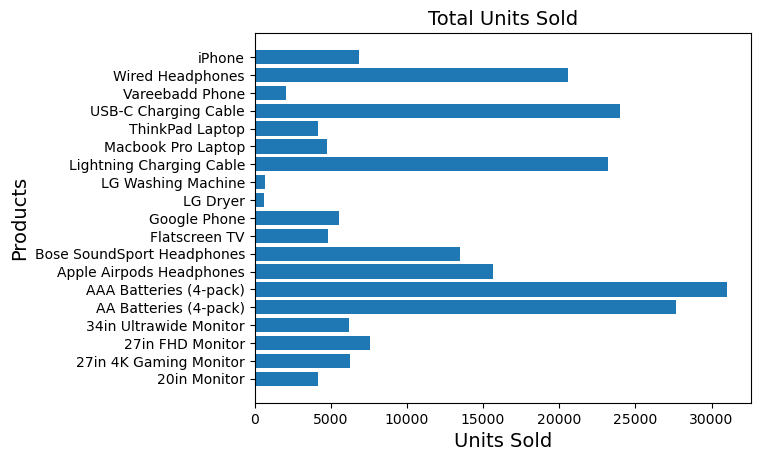

In [53]:
product_group = sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.barh(products,quantity_ordered)

plt.title('Total Units Sold', fontsize = 14)
plt.ylabel('Products', fontsize = 14) 
plt.xlabel('Units Sold', fontsize = 14)

plt.yticks(products)
plt.show()

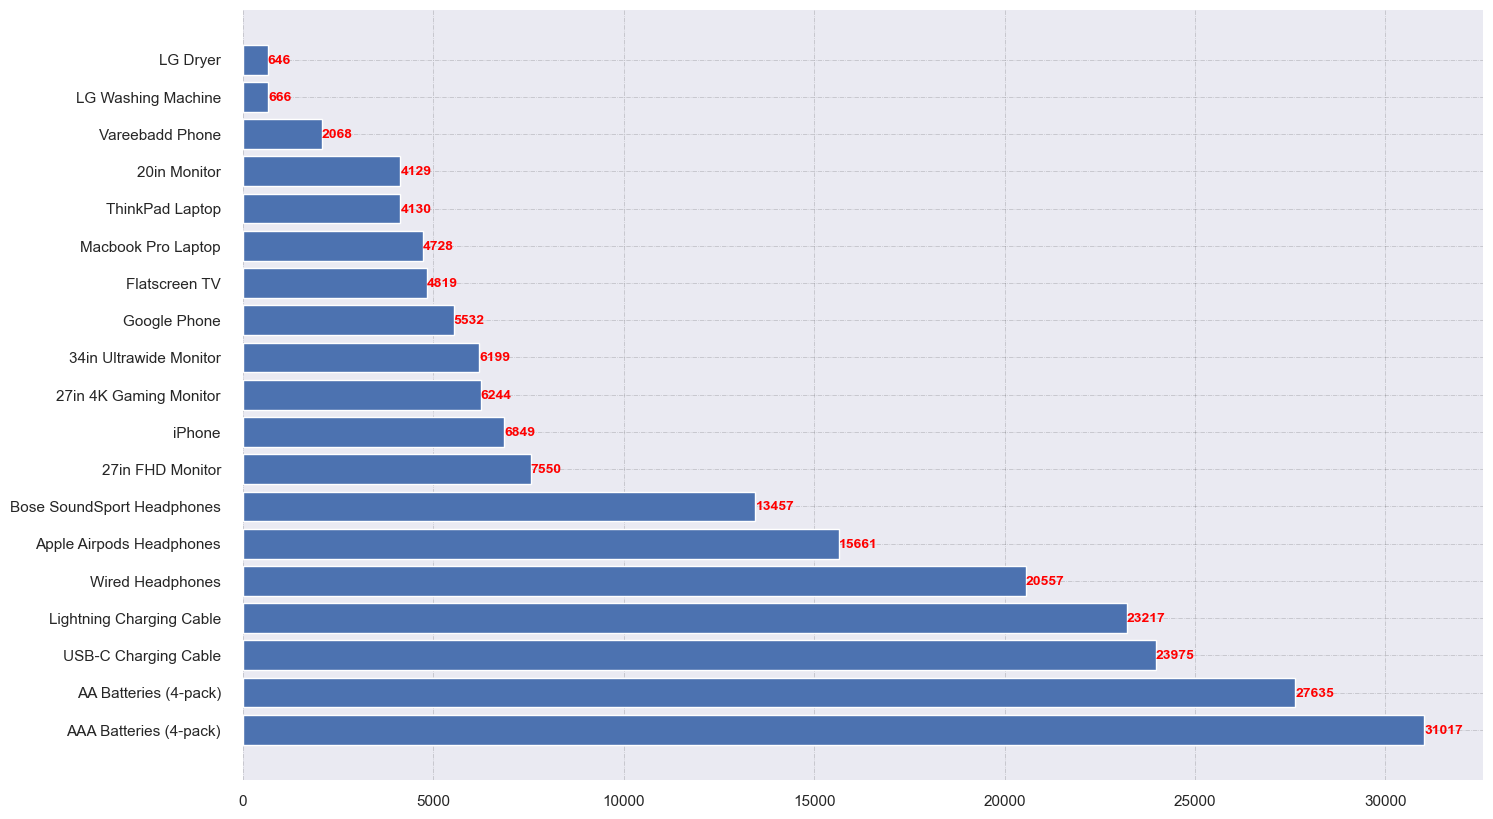

In [56]:
sns.set()
fig, ax = plt.subplots(figsize = (16, 10))

product_group = sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

sort_sum = quantity_ordered.sort_values(ascending=True)
sort_sum = pd.DataFrame(sort_sum)
sort_sum = sort_sum.reset_index()

product = sort_sum['Product']
quantity = sort_sum['Quantity Ordered']

ax.barh(product,quantity)

#Another Annotations for the bar
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.5, str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight = "bold", color = "red")
    
#Remove x, y Ticks
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")

#Add padding / Spaces between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

#Add x, y gridlines
ax.grid(visible=True, color="black", linestyle="-.", linewidth=0.5, alpha=0.2)

#show top values
ax.invert_yaxis()

#Removes spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()


### Subplots

#### Create hphone dataframe from the sort sum dataframe

In [57]:
hphone = sort_sum[sort_sum['Product'].isin(['Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Wired Headphones'])]
hphone

,Product,Quantity Ordered
12,Bose SoundSport Headphones,13457
13,Apple Airpods Headphones,15661
14,Wired Headphones,20557


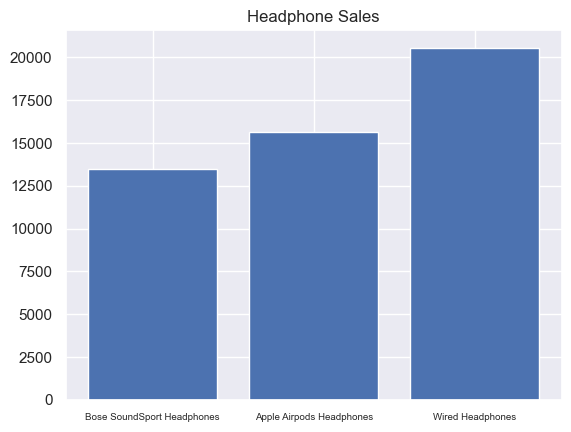

In [58]:
h_product = hphone['Product']
h_quantity = hphone['Quantity Ordered']
plt.bar(h_product,h_quantity)
plt.title('Headphone Sales')

plt.xticks(h_product,size=7)
plt.show()

In [59]:
phone = sort_sum[sort_sum['Product'].isin(['Google Phone', 'Vareebadd Phone', 'iPhone'])]
phone

,Product,Quantity Ordered
2,Vareebadd Phone,2068
7,Google Phone,5532
10,iPhone,6849


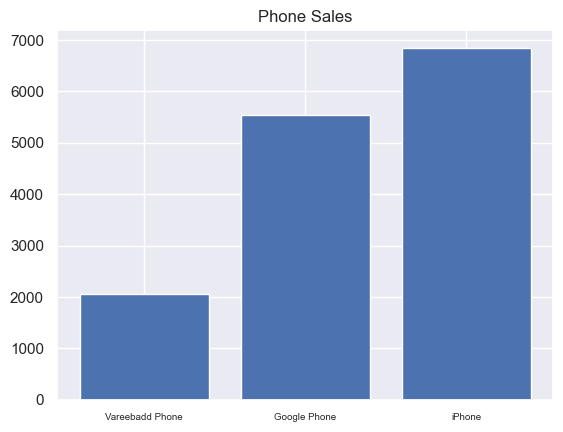

In [60]:
p_product = phone['Product']
p_quantity = phone['Quantity Ordered']
plt.bar(p_product,p_quantity)
plt.title('Phone Sales')

plt.xticks(p_product,size=7)
plt.show()

### Subplots : Side by side graphs

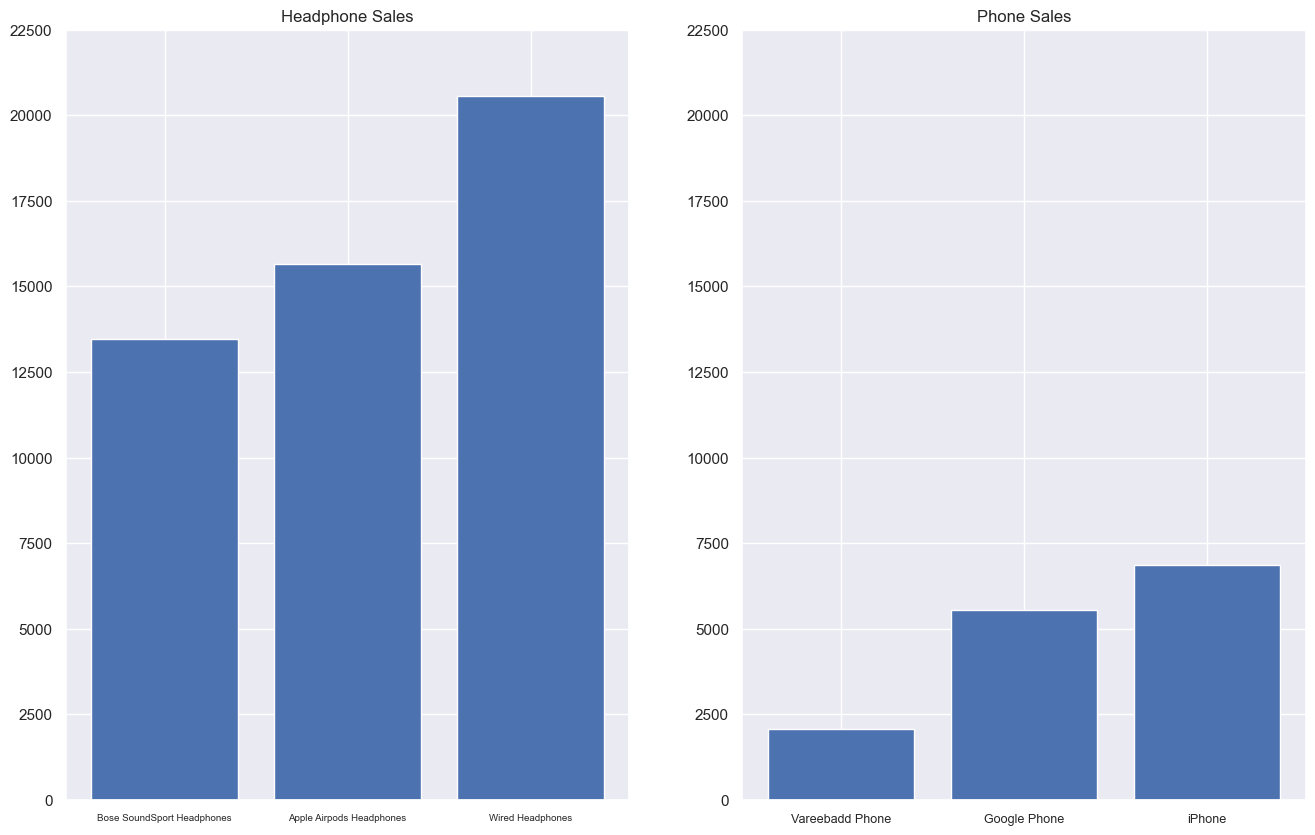

In [61]:
fig = plt.figure(figsize = (16,10))

#Plot 1
h_product = hphone['Product']
h_quantity = hphone['Quantity Ordered']

plt.subplot(1,2,1)

plt.bar(h_product,h_quantity)
plt.title('Headphone Sales')

plt.xticks(h_product,size=7)
plt.ylim(0,22500)

#Plot 2
p_product = phone['Product']
p_quantity = phone['Quantity Ordered']

plt.subplot(1,2,2)

plt.bar(p_product,p_quantity)
plt.title('Phone Sales')

plt.xticks(p_product,size=9)
plt.ylim(0,22500)

plt.show()

### Subplots : Top-bottom graphs

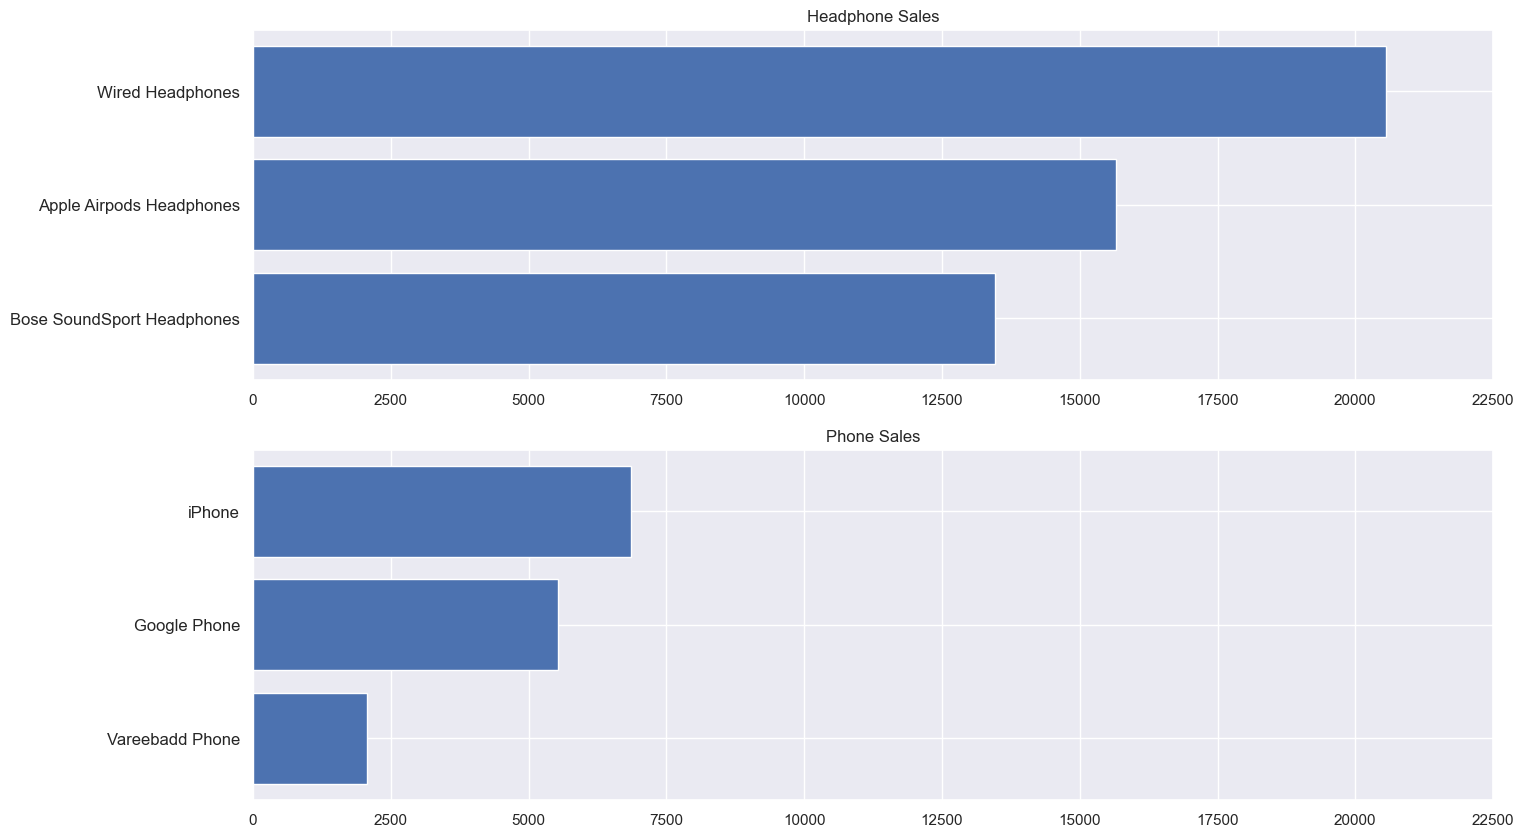

In [62]:
fig = plt.figure(figsize = (16,10))

#Plot 1
h_product = hphone['Product']
h_quantity = hphone['Quantity Ordered']

plt.subplot(2,1,1)

plt.barh(h_product,h_quantity)
plt.title('Headphone Sales')

plt.yticks(h_product,size=12)
plt.xlim(0,22500)

#Plot 2
p_product = phone['Product']
p_quantity = phone['Quantity Ordered']

plt.subplot(2,1,2)

plt.barh(p_product,p_quantity)
plt.title('Phone Sales')

plt.yticks(p_product,size=12)
plt.xlim(0,22500)

plt.show()